# Szeregi czasowe

In [1]:
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Zadanie
Wczytaj dane "Minimum Daily Temperatures Dataset", które podają temperaturę w stopniach celsjuszaw w Australji.

In [2]:
import pandas as pd
series = pd.read_csv('daily-minimum-temperatures.csv', index_col = 0, squeeze = True, parse_dates=['Date'])

# Zadanie
Wykonaj Line Plot

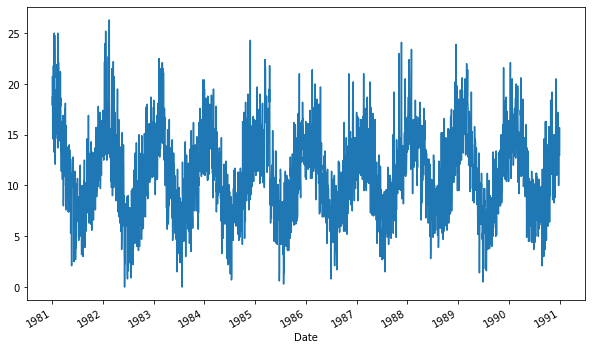

In [3]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

# lag_plot

Modelowanie szeregów czasowych zakłada związek między daną obserwacją a poprzednią.

Poprzednie obserwacje w szeregu czasowym nazywane są lags (opóźnieniem). Obserwacja w poprzednim kroku to lag1, obserwacji  z przed dwóch kroków czasowych to lag2, i tak dalej.

Pandas posiada specjalny typ wykresu umożliwiający zbadanie zależności między obserwacją a opóźnieniem - lag_plot.

Sporządza ona wykres obserwacji w czasie t na osi x i obserwacji lag1 (t-1) na osi y.
- Jeśli punkty skupiają się wzdłuż linii przekątnej od lewego dolnego rogu do górnego prawego rogu wykresu, sugeruje ona dodatnią korelacyjne.
- Jeśli punkty skupiają się wzdłuż przekątnej od górnego lewego do prawego dolnego to sugeruje to ujemną korelacje.
Im bardziej obserwacje przylegają do przekątnej tym silniejsza relacja, a im bardziej są one rozproszone tym słabsza.


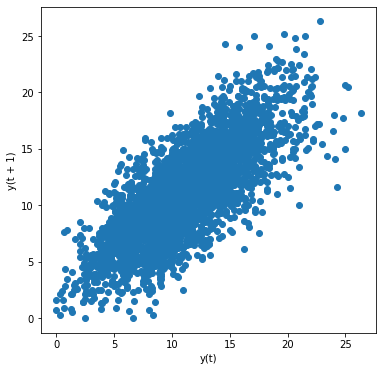

In [4]:
from pandas.plotting import lag_plot
plt.figure(figsize=(6,6));
lag_plot(series)
plt.show()

Możemy narysować relację dla różnych wartości

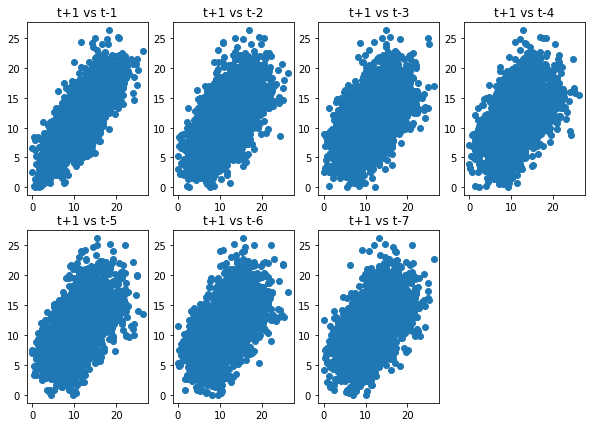

In [5]:
plt.figure(figsize=(10,7));
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

# Zad

Narysuj 
```python
lag_plot
```
dla 

  * lag=150
  * lag=365

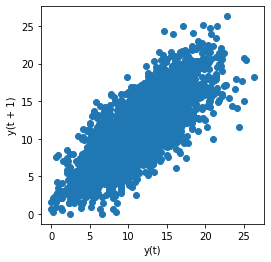

In [6]:
from pandas.plotting import lag_plot

plt.figure(figsize=(4,4));
lag_plot(series, lag=1)
plt.show()

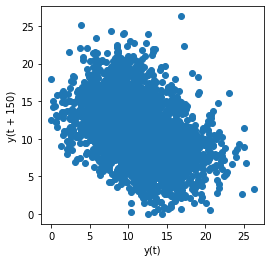

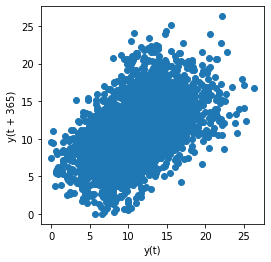

In [7]:
from pandas.plotting import lag_plot

plt.figure(figsize=(4,4));
lag_plot(series, lag=150)
plt.show()

plt.figure(figsize=(4,4));
lag_plot(series, lag=365)
plt.show()

# Autocorrelation

Możemy ocenić siłę i rodzaj zależności pomiędzy obserwacjami a ich lags (opóźnieniami).

W statystyce nazywa się to korelacją, a kiedy obliczane są wartości opóźnień w szeregach czasowych, nazywa się autokorelacją.
Wartość korelacji obliczona między dwiema grupami liczb, takimi jak obserwacje i ich wartościami lag1, daje liczbę między -1 i 1. 

Znak liczby wskazuje odpowiednio ujemną lub dodatnią korelację. Wartość bliska zeru sugeruje słabą korelację, podczas gdy wartość bliżej -1 lub 1 wskazuje na silną korelację.

Wartości korelacji, zwane współczynnikami korelacji, można obliczyć dla każdej obserwacji i różnych wartości opóźnienia. Po obliczeniu można utworzyć wykres, aby lepiej zrozumieć, jak relacja ta zmienia się wraz ze wzrostem opóźnienia.


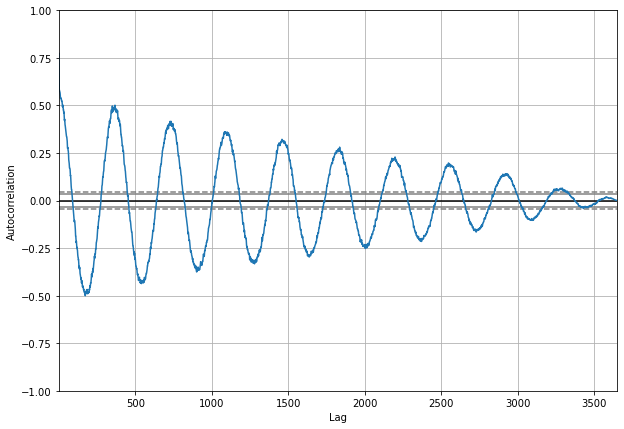

In [16]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,7));
autocorrelation_plot(series)
plt.show()

Otrzymana wykres przedstawia opóźnienie wzdłuż osi x i korelację na osi y. Przerywane linie wskazują obszar krytyczny, powyżej tego obszaru korelacje są statystycznie znaczące.

Widzimy, że dla naszego zestawu danych mamy cykle silnej ujemnej i pozytywnej korelacji. Ujmuje oznaczają związek obserwacji w przeciwnych porach roku. Fale sinusoidalne, jak widać w tym przykładzie, są mocnym znakiem sezonowości w zestawie danych.


# Zad.
Wykonaj wykres autokorelacji dala naych AirPassengers.csv.

In [17]:
import pandas as pd
data = pd.read_csv('./AirPassengers.csv', index_col = 'Month', squeeze = True, parse_dates=['Month'])
print(data.head())

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


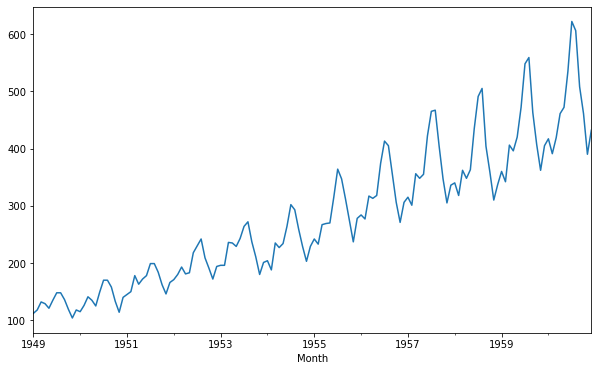

In [18]:
plt.figure(figsize=(10,6));
data.plot()
plt.show()

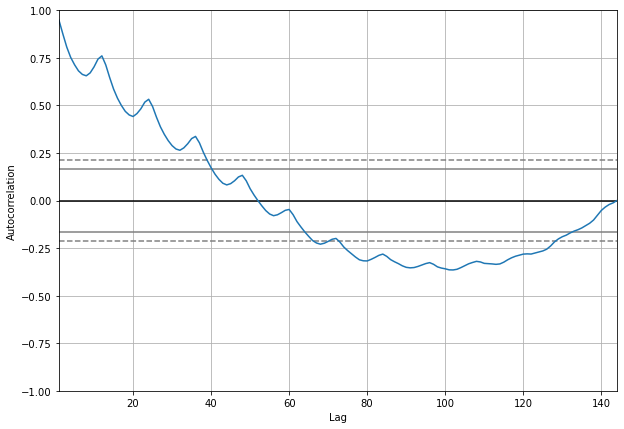

In [19]:
plt.figure(figsize=(10,7));
autocorrelation_plot(data)
plt.show()